In [22]:

%pip install pandas seaborn matplotlib numpy
import numpy as np
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt

df=pd.read_csv('/Users/eyupalasoy/Desktop/project_4/app_project/vehicles_us.csv')

Note: you may need to restart the kernel to use updated packages.


Title & Introduction
Title: Exploratory Data Analysis (EDA) for Car Listings Dataset

Introduction:
This analysis aims to explore a car listings dataset to understand relationships between pricing, mileage, model year, and other variables. The process involves data cleaning, handling missing values, and visualization techniques to extract meaningful insights.

In [23]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [24]:
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [26]:
print(df.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [27]:
df.drop(columns=['is_4wd'],inplace=True)
df['paint_color'].fillna('unknown',inplace=True)
df


/var/folders/60/bc5wkpld7w34kxlqbx9q7vv00000gn/T/ipykernel_28232/3049208129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['paint_color'].fillna('unknown',inplace=True)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,2018-07-02,71


Handling Missing Data


In [28]:
#model_year: Missing values are replaced with the median model year within the same model group:
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))
#odometer: Since mileage is often related to model year and fuel type, 
#missing values are filled with the median mileage of cars with the same model and fuel type:
df['odometer'] = df['odometer'].fillna(df.groupby(['model', 'fuel'])['odometer'].transform('median'))


In [29]:
df



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,2018-07-02,71


In [30]:
print(df.isnull().sum())

price              0
model_year         0
model              0
condition          0
cylinders       5260
fuel               0
odometer          50
transmission       0
type               0
paint_color        0
date_posted        0
days_listed        0
dtype: int64


In [31]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'date_posted',
       'days_listed'],
      dtype='object')

In [32]:
df['model'].value_counts(ascending=False)

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

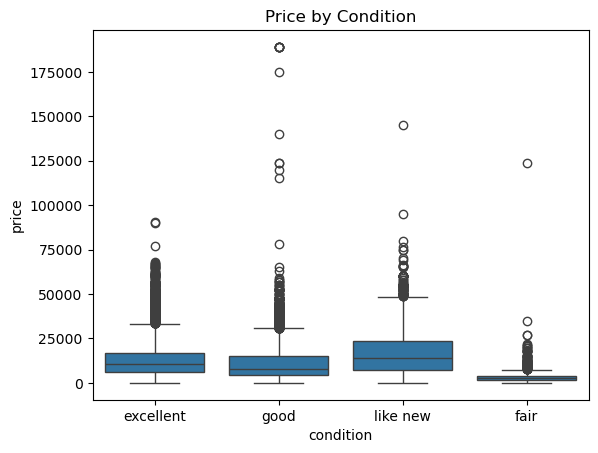

In [33]:
df_filtered=df[df['price']<200000]
sns.boxplot(data=df_filtered, x='condition', y='price', order=['excellent', 'good', 'like new', 'fair'])
plt.title('Price by Condition')
plt.show()


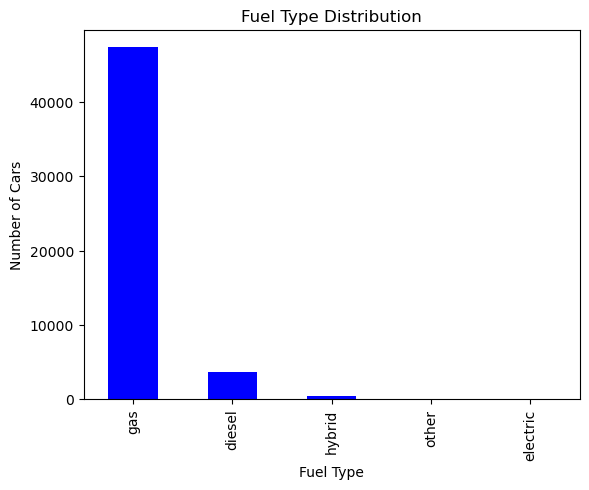

In [34]:
fuel_type=df['fuel'].value_counts()
fuel_type.plot(kind='bar', color='blue')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.show()

In [35]:
listed_days_sorted=df.groupby('model')['days_listed'].mean()
listed_days_sorted_df=listed_days_sorted.reset_index().sort_values(by='days_listed',ascending=False)
listed_days_sorted_df.columns = ['Model', 'Average Days Listed']
print(listed_days_sorted_df)

                 Model  Average Days Listed
71         kia sorento            43.355932
17  chevrolet suburban            42.548043
51          gmc acadia            42.441270
1               bmw x5            42.419476
50         ford taurus            42.128713
..                 ...                  ...
99   volkswagen passat            37.414286
62     hyundai elantra            37.260047
61         honda pilot            37.109272
25        dodge dakota            36.334711
39           ford f250            36.209440

[100 rows x 2 columns]


In [36]:
price_mean=df.groupby('model')['price'].mean()
price_mean_df=price_mean.reset_index().sort_values(by='price',ascending=False)
print(price_mean_df)


                                model         price
73  mercedes-benz benze sprinter 2500  34900.000000
14      chevrolet silverado 1500 crew  29099.174917
16         chevrolet silverado 3500hd  25121.658436
48           ford mustang gt coupe 2d  25013.784053
38        ford f150 supercrew cab xlt  24877.960245
..                                ...           ...
68                       jeep liberty   5554.005634
81                       nissan versa   5249.368613
25                       dodge dakota   4990.702479
50                        ford taurus   4908.211221
19              chevrolet trailblazer   4143.698039

[100 rows x 2 columns]


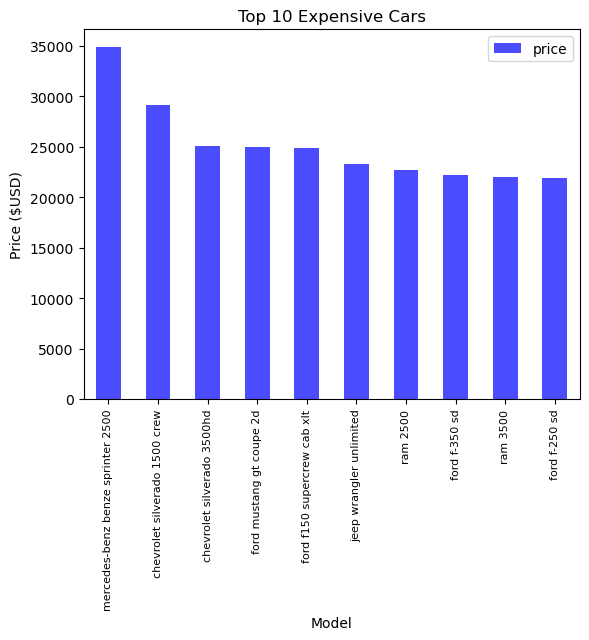

In [37]:
top_10_price=price_mean_df.head(10)
bottom_10_price=price_mean_df.tail(10)
top_10_price.plot(kind='bar',x='model',y='price',title='Top 10 Expensive Cars',color='blue',alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Price ($USD)')
plt.xticks(fontsize=8)
plt.show() 

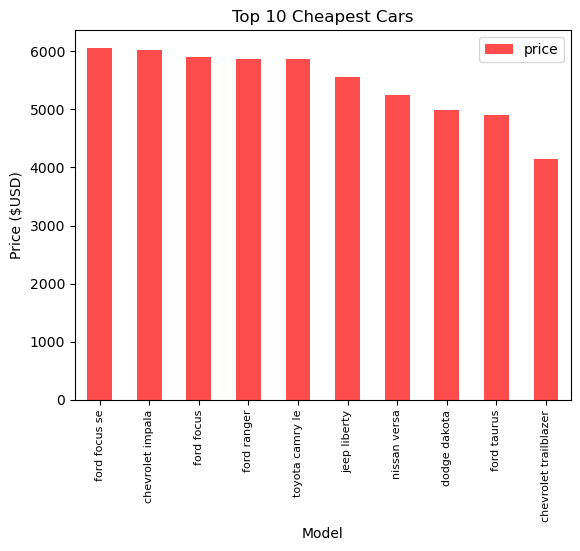

In [38]:
bottom_10_price.plot(kind='bar',x='model',y='price',title='Top 10 Cheapest Cars',color='red',alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Price ($USD)')
plt.xticks(fontsize=8)
plt.show()  

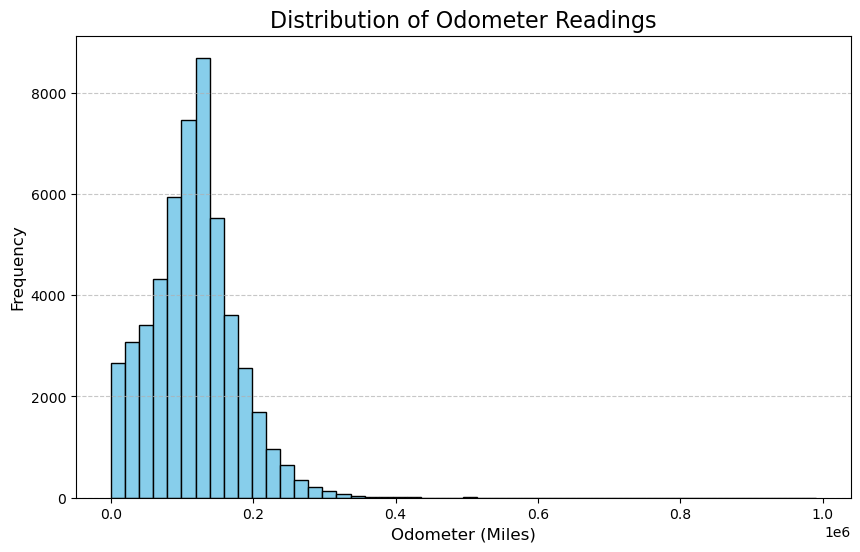

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df['odometer'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Odometer (Miles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Odometer Readings', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


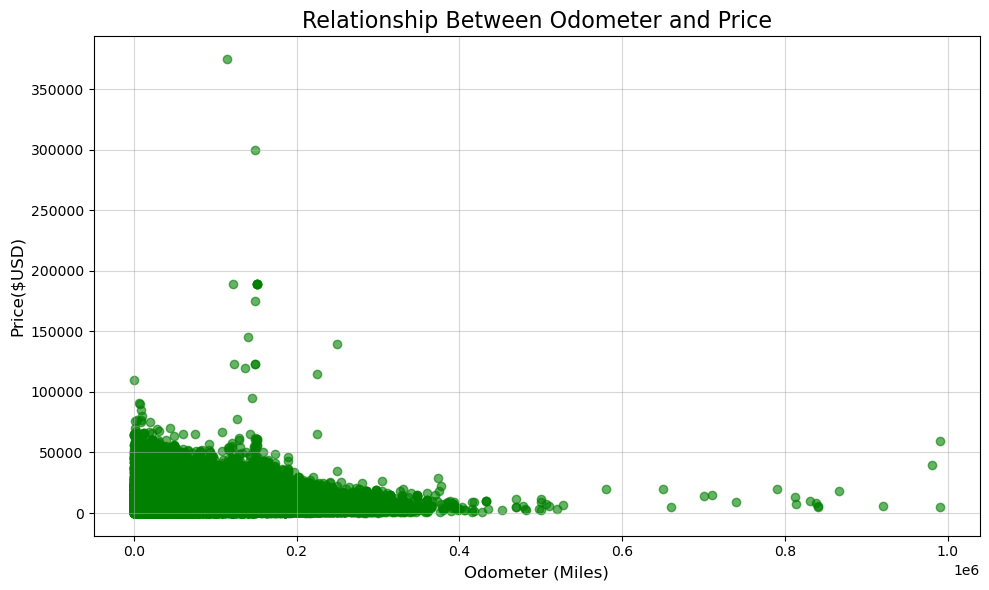

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.6, color='green')
plt.xlabel('Odometer (Miles)', fontsize=12)
plt.ylabel('Price($USD)', fontsize=12)
plt.title('Relationship Between Odometer and Price', fontsize=16)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

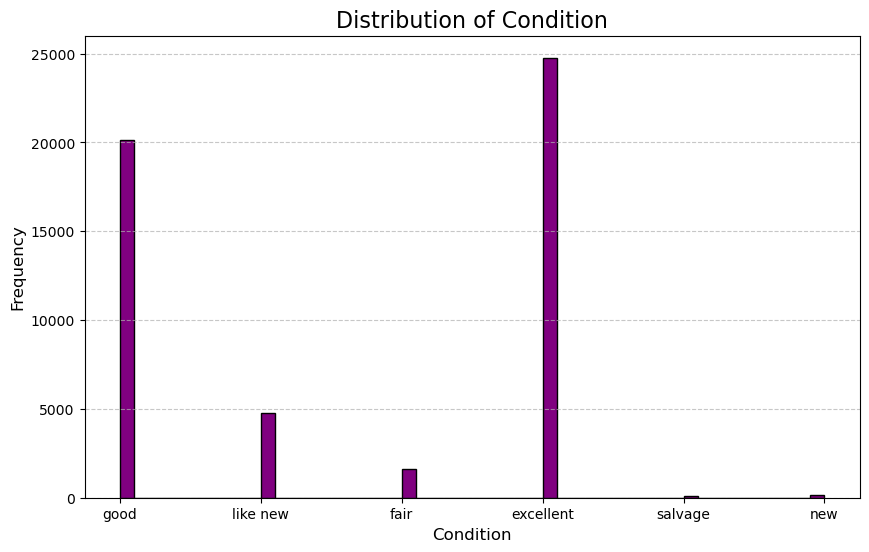

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['condition'],bins=50,color='purple',edgecolor='black')
plt.xlabel('Condition',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Distribution of Condition',fontsize=16)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

## Conclusion
- Newer cars dominate the dataset and generally have lower mileage.
- Cylinder count is mostly consistent within the same model, and missing values were effectively filled using mode.
- Odometer readings correlate with model year, making them useful for predictive modeling.
- Data visualization highlights key trends in the used car market, which can aid decision-making.